#### Classification of animals in a zoo based on given dataset. 
         It is a supervised problem in machine learning where we have a labeled dataset.
         This dataset consists of 101 animals from a zoo.
         Animal class types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

#### Importing necessary libaries and adding some later whenever needed

In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [47]:
import warnings
warnings.filterwarnings("ignore")

#### Importing the zoo file 

In [48]:
zoo = pd.read_csv(r"C:\Users\Vishnu Priya\Desktop\Besant MS DS\Projects ML\zoo.csv")
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [49]:
class_types = pd.read_csv(r"C:\Users\Vishnu Priya\Desktop\Besant MS DS\Projects ML\class.csv")
class_types.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [50]:
new_zoo = zoo.copy()
len(new_zoo)

101

In [51]:
new_class_types = class_types.copy()
len(new_class_types)

7

In [52]:
new_zoo.shape # gives the total number of rows and columns in the dataset

(101, 18)

In [53]:
new_zoo.describe()  #gives the statistcal summary of the dataset

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [54]:
new_zoo.dtypes #gives the data type of each object

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object

In [55]:
display(new_zoo.head())
display(new_class_types)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [56]:
classes = list(new_class_types['Class_Type'])
classes

['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

In [57]:
# new_data = pd.merge(new_zoo, new_class_types, how='left', left_on='class_type', right_on='Class_Number')
# new_data.head()

In [58]:
new_zoo['animal_name'].duplicated().value_counts()   # This tells us there is a duplicate entry

False    100
True       1
Name: animal_name, dtype: int64

In [59]:
#It tells us if there are duplicates in any animal_name
duplicates = new_zoo.animal_name.value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal_name, dtype: int64

In [60]:
frog = new_zoo.loc[new_zoo['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [61]:
new_zoo['animal_name'][(new_zoo.venomous == 1 )& (new_zoo.animal_name == 'frog')] = "venoumous_frog"
v_frog = new_zoo.loc[new_zoo['animal_name'] == 'venoumous_frog']
v_frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
26,venoumous_frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [62]:
frog = new_zoo.loc[new_zoo['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5


#### Visualization of the given data
    --> Using Pie Chart
    --> Using Countplot

#### PIECHART

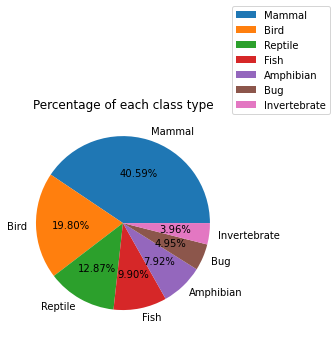

In [63]:
plt.title("Percentage of each class type")
types = ("Mammal", "Bird", "Reptile", "Fish", "Amphibian", "Bug", "Invertebrate")
count = new_zoo['class_type'].value_counts()
plt.pie(count,labels = types, autopct="%.2f%%")
plt.legend(loc=(1,1))
plt.show()

#### COUNTPLOT

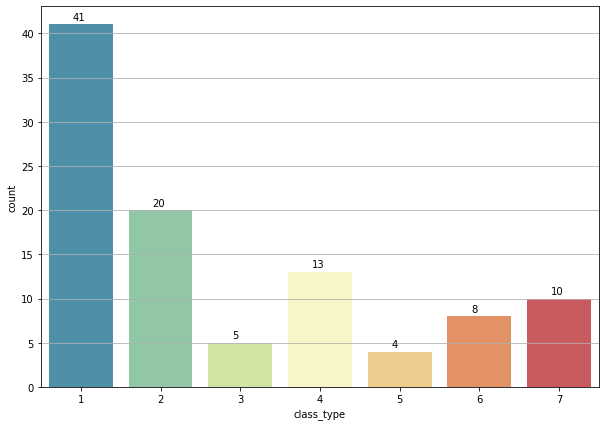

In [71]:
# types = ("Mammal", "Bird", "Reptile", "Fish", "Amphibian", "Bug", "Invertebrate")
# sns.countplot(x=new_zoo["class_type"])

plt.figure(figsize = (10,7))
plt.grid(True)
ax = sns.countplot(x='class_type', data=new_zoo, palette='Spectral_r')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.5))

In [72]:
new_zoo['class_type'].value_counts()  #tells us the count of different classtypes

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

In [73]:
new_zoo.isna().sum() #checking to see if there is any empty/null values in the dataset

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

#### CORELLATION WITH HEATMAP

<AxesSubplot:>

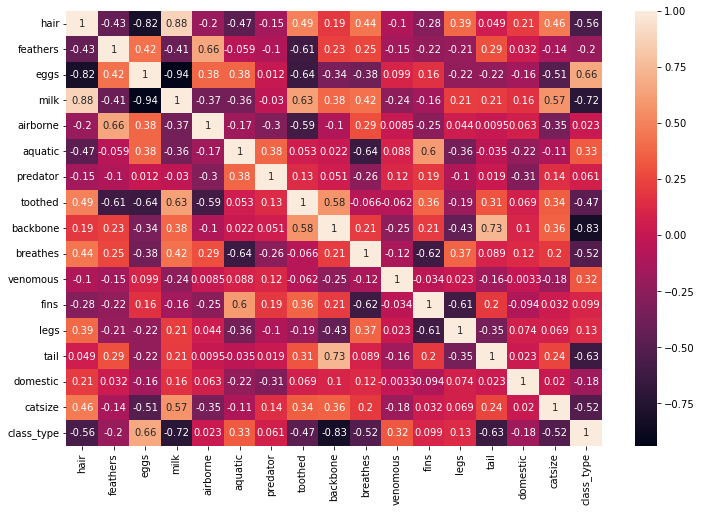

In [74]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(new_zoo.corr(),annot = True)   

In [75]:
new_zoo.drop('animal_name',axis=1,inplace=True)
new_zoo.head() #since the name of the animal is not entirely necessary, we are deleting it

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [76]:
X=new_zoo.drop('class_type',axis=1)
y=new_zoo['class_type']
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


#### TRAINING AND TESTING THE MODEL

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state = 5555)

In [78]:
len(X_train),len(X_test),len(y_train),len(y_test)

(80, 21, 80, 21)

In [79]:
X_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0
95,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1
46,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
86,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1
73,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
70,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
32,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1


#### LOGISTIC REGRESSION


In [80]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
predictions

array([1, 4, 5, 2, 7, 4, 4, 1, 1, 1, 1, 1, 1, 2, 1, 6, 1, 2, 1, 2, 6],
      dtype=int64)

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, predictions)

array([[10,  0,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

In [82]:
accuracy_score(y_test, predictions)

1.0

#### NAIVE BAYES ALGORITHM
    This algorithm can be used to compute the probability that a given sample belongs to a given class. Hence we can use the equation as a classification algorithm.

In [83]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


#### DECISION TREE ALGORITHM

In [84]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [85]:
tree = DecisionTreeClassifier(criterion='gini') 
tree.fit(X_train,y_train)
predictions = tree.predict(X_test)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.952


In [86]:
accuracy_score(y_test, predictions)

0.9523809523809523

#### RANDOM FOREST ALGORITHM

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
tree = RandomForestClassifier()
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000
